In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
import seaborn as sns
import random
from statsmodels.api import OLS
plt.rcParams['figure.figsize'] = (20.0, 15.0) # set the size of chart windows

In [3]:
# Making data with noise

n = 10000 # 10000 points
X_1d = np.random.uniform(-1,1, n) #randomim X from -1 to 1
noise = np.random.normal(0, 10, n) # generate noise by Gaussian distribution
true_w, true_b = 7.6, -3.3 #We set the parameters that we will try to calculate by regression

#We calculate values at our points with a noise equal to approximately 2%
y_1d = true_w * X_1d + true_b + noise # y = w * x + b + ε 

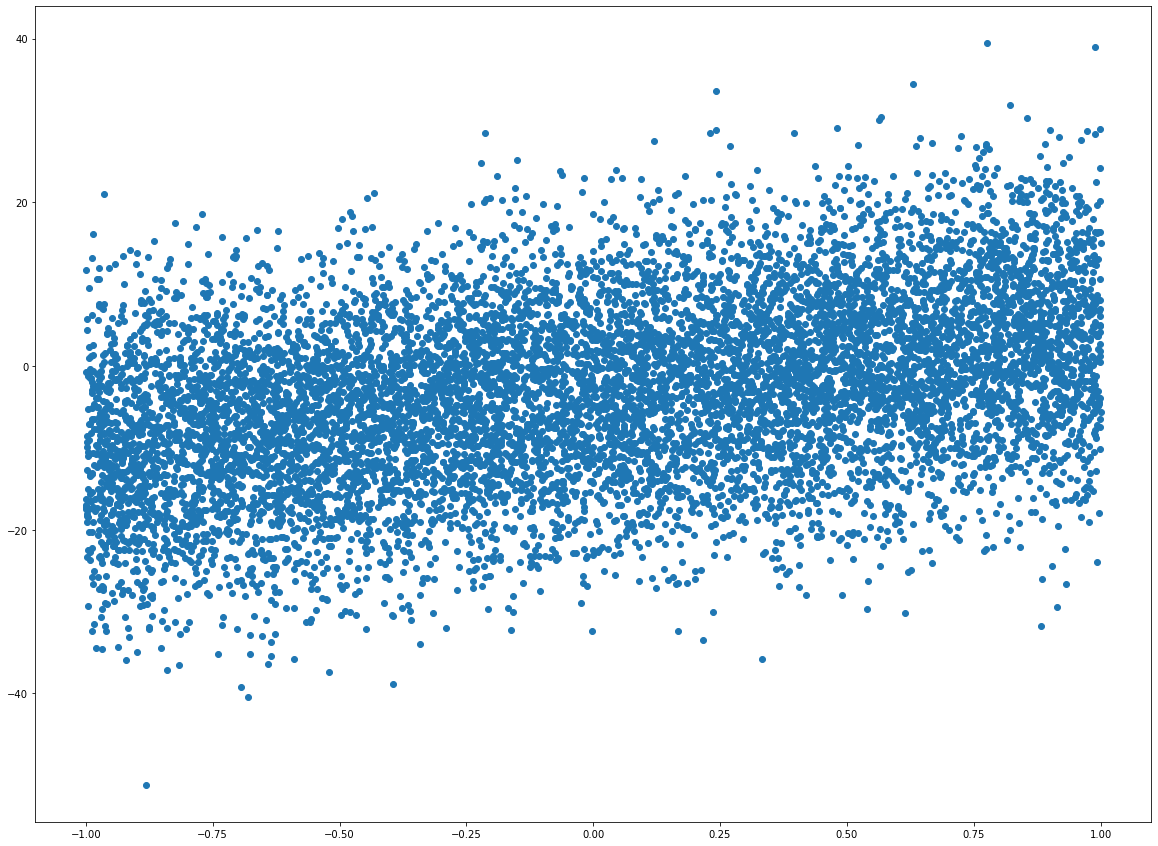

In [4]:
plt.scatter(X_1d,y_1d)

In [5]:
#Dial points
X_train, X_test, y_train, y_test = train_test_split(X_1d, y_1d, test_size=0.25, random_state=0)
#We prepare the data so that we can feed it to sklearn. We have one feature under x
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7500, 1) (2500, 1) (7500,) (2500,)


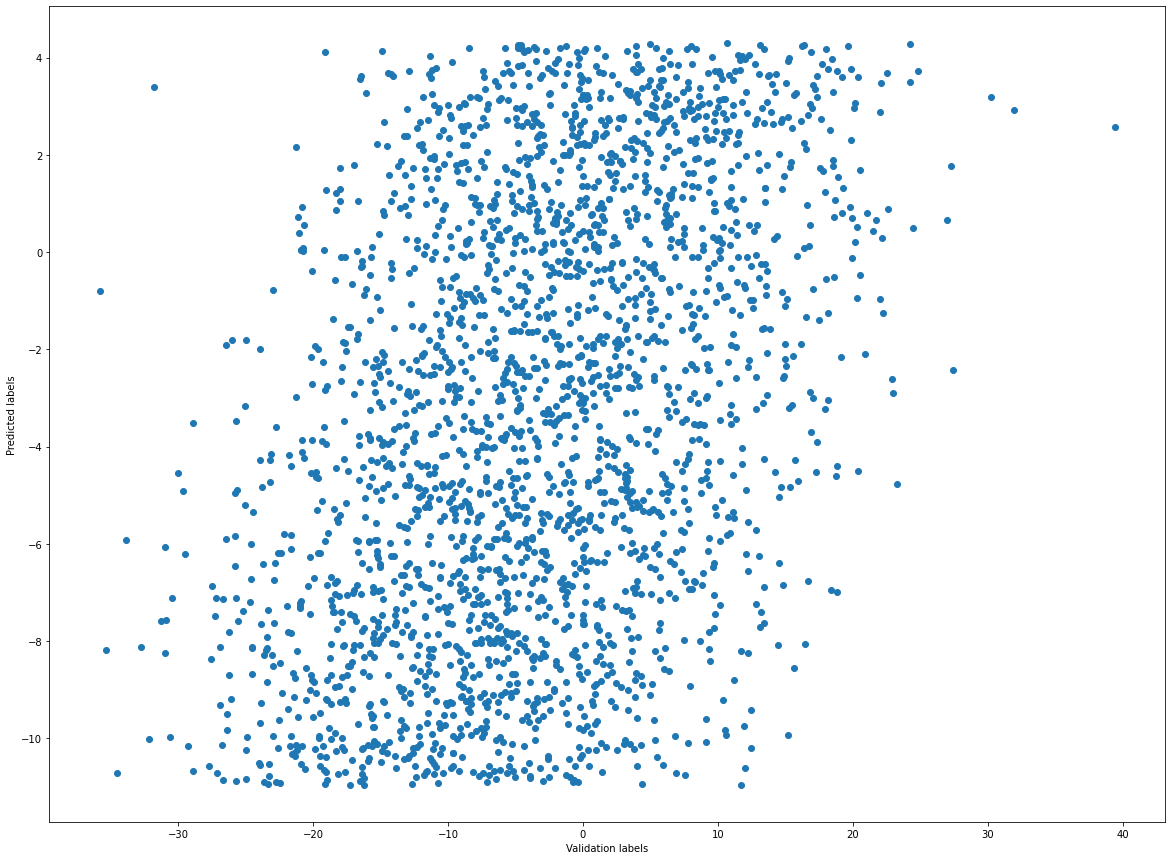

In [6]:
# Let's fire up sklearn and see how it does.
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Validation labels')
plt.ylabel('Predicted labels');

In [7]:
olsfit=OLS(y_train,X_train).fit()
olsfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.146
Model:                            OLS   Adj. R-squared (uncentered):              0.146
Method:                 Least Squares   F-statistic:                              1283.
Date:                Thu, 09 Jun 2022   Prob (F-statistic):                   1.55e-259
Time:                        00:50:27   Log-Likelihood:                         -28263.
No. Observations:                7500   AIC:                                  5.653e+04
Df Residuals:                    7499   BIC:                                  5.654e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             7.5447      0.211     35.820      0.000       7.132       7.958
==============================================================================
Omnibus:                        2.743   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.254   Jarque-Bera (JB):                2.777
Skew:                          -0.044   Prob(JB):                        0.249
Kurtosis:                       2.966   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#to then compare the MSE of sklearn and the resulting method
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print("Mean Square Error : ", mse)

Mean Square Error :  99.19454401549356


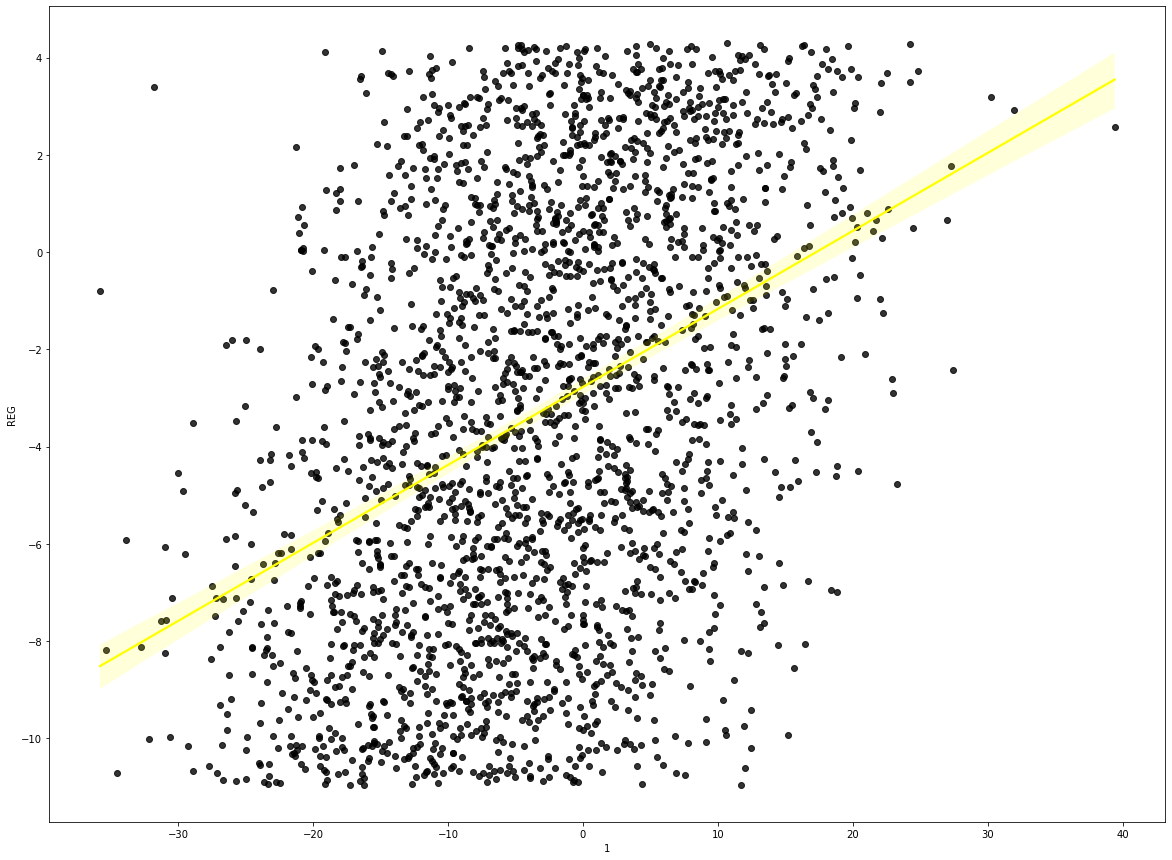

In [12]:
#Forming data for pandas and rendering
res = pd.DataFrame()
res['1'] = y_test
res['REG'] = lm.predict(X_test)
ax = sns.regplot(x="1", y="REG", data=res[['1','REG']],
                 scatter_kws={"color": "black"}, line_kws={"color": "yellow"})

In [13]:
b=np.ones(shape=(X_1d.shape[0],1))

X=X_1d.reshape(-1, 1)

X=np.concatenate((b,X),axis=1)

y=y_1d.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
def eta_new(t):
    return 4/(1 + t) +0.01

In [15]:
#necessary functions
def model(X,w):
    return np.dot(X,w).reshape(-1,1)

#gradient
def grad(X,y,w):
    y_hat=model(X,w)
    grad=np.dot(X.transpose(),(y_hat-y))
    return grad

#loss function
def loss(X,y,w):
    y_hat=model(X,w)
    lss=np.dot((y_hat-y).transpose(),(y_hat-y))
    return lss

#packet separation
def batch_split(X,y,batch_size):
    batches=[]
    data=np.concatenate((X,y),axis=1)
    np.random.shuffle(data)
    batch_num=data.shape[0]//batch_size
    i=0
    
    for i in range(batch_num+1):
        batch=data[i*batch_size:(i+1)*batch_size,:]
        X_batch=batch[:,:-1]
        y_batch=batch[:,-1].reshape((-1,1))
        batches.append((X_batch,y_batch))
    if data.shape[0] % batch_size !=0:
        batch=data[i*batch_size:data.shape[0],:]
        X_batch=batch[:,:-1]
        y_batch=batch[:,-1].reshape((-1,1))
        batches.append((X_batch,y_batch))
    return batches
    
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 2) (3000, 2) (7000, 1) (3000, 1)


In [16]:
w=np.random.multivariate_normal(mean=np.zeros(X_train.shape[1]),
                             cov=np.eye(X_train.shape[1],X_train.shape[1])).reshape((2,1))
print(w)
num_epochs=100 
batch_size=32
learning_rate = 0.01

#descent speed - time
#education
batch_loss=[]
epoch_loss=[]
val_loss=[]

#coef = #random initial values
for epoch in range(num_epochs+1):
    
    #pendulum flies into space
    batches=batch_split(X_train,y_train,batch_size)
    for batch in batches:
        X_batch,y_batch = batch
        batch_loss.append(loss(X_batch,y_batch,w))
        grd=grad(X_batch,y_batch,w)
        w=w-learning_rate*grd
    epoch_loss.append(loss(X_train,y_train,w))
    val_loss.append(loss(X_test,y_test,w))
print(w)

[[1.47793435]
 [0.46474746]]
[[-2.93129955]
 [ 7.53625493]]


(22220,)


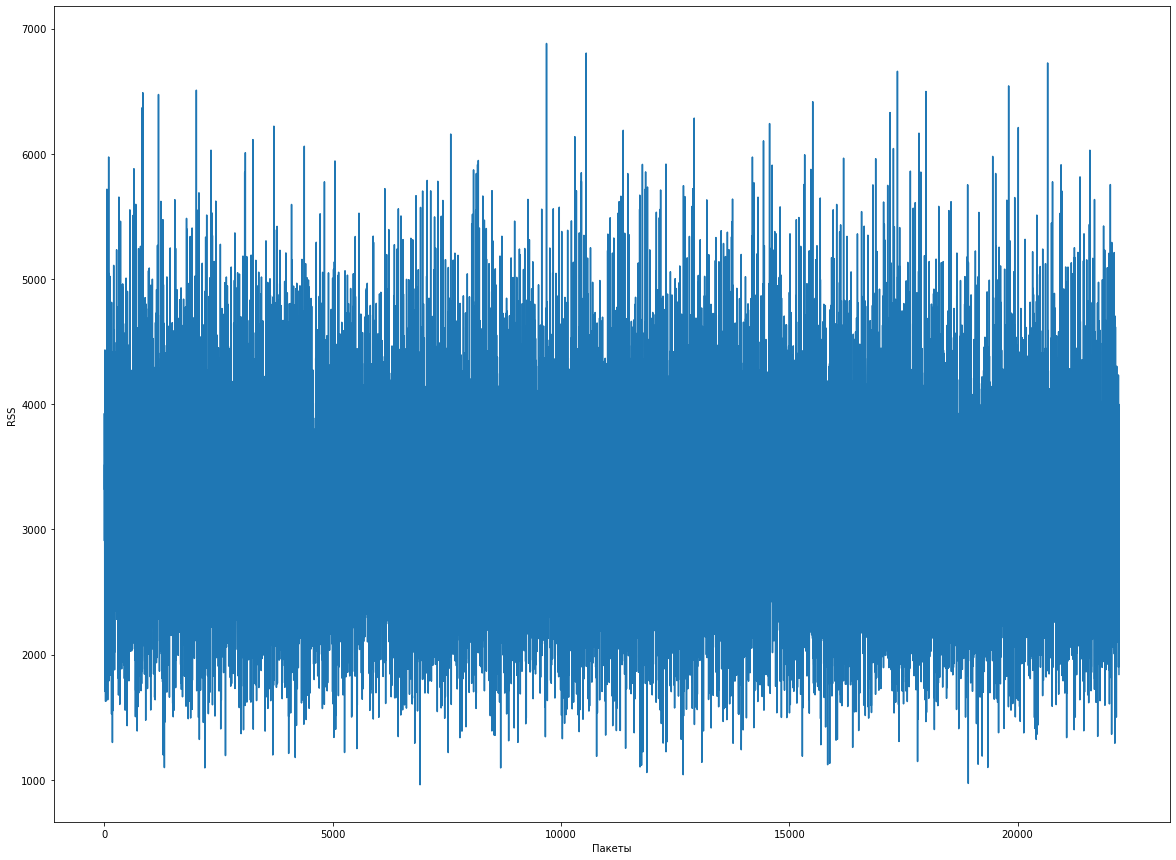

In [17]:
blss=np.asarray(batch_loss)
blss=blss.reshape(blss.shape[0])
print(blss.shape)

plt.plot(blss)
plt.xlabel("Пакеты")
plt.ylabel("RSS")
plt.show()

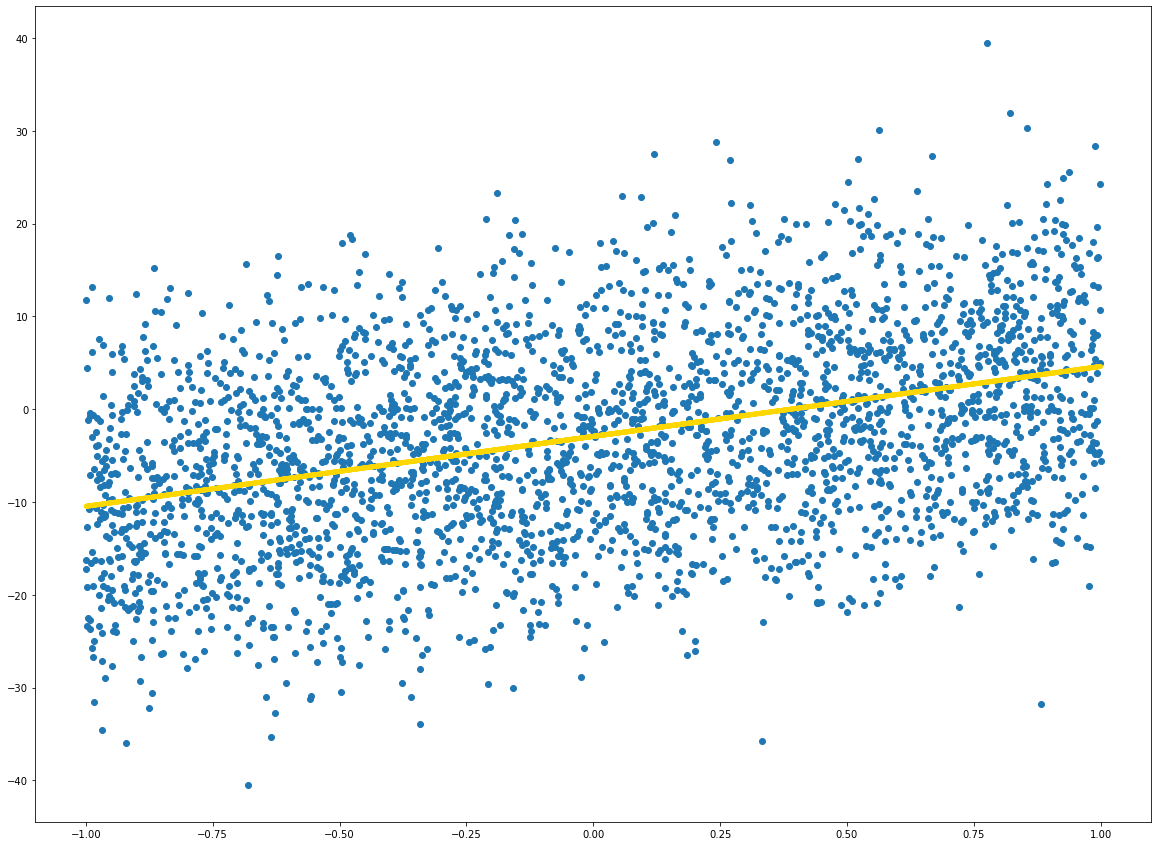

In [18]:
#model validation on test data
y_pred=model(X_test, w)
plt.scatter(X_test[:,1],y_test[:,])
plt.plot(X_test[:,1],y_pred, color='gold', linewidth=5)
plt.show()

In [19]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [20]:
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=10000, early_stopping=True,
                                 n_iter_no_change=50,
                                average=True))

In [21]:
fit=reg.fit(X_train, y_train)

C:\Users\Lochin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [22]:
reg.score(X_train, y_train)

0.1657246850434264

In [23]:
reg['sgdregressor'].coef_

array([0.        , 4.35906418])

In [24]:
reg2=SGDRegressor(max_iter=10000, early_stopping=True,
                                 n_iter_no_change=50,
                                average=True)

In [25]:
fit=reg2.fit(X_train, y_train)

C:\Users\Lochin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [26]:
reg2.coef_

array([-1.64334298,  7.69046574])

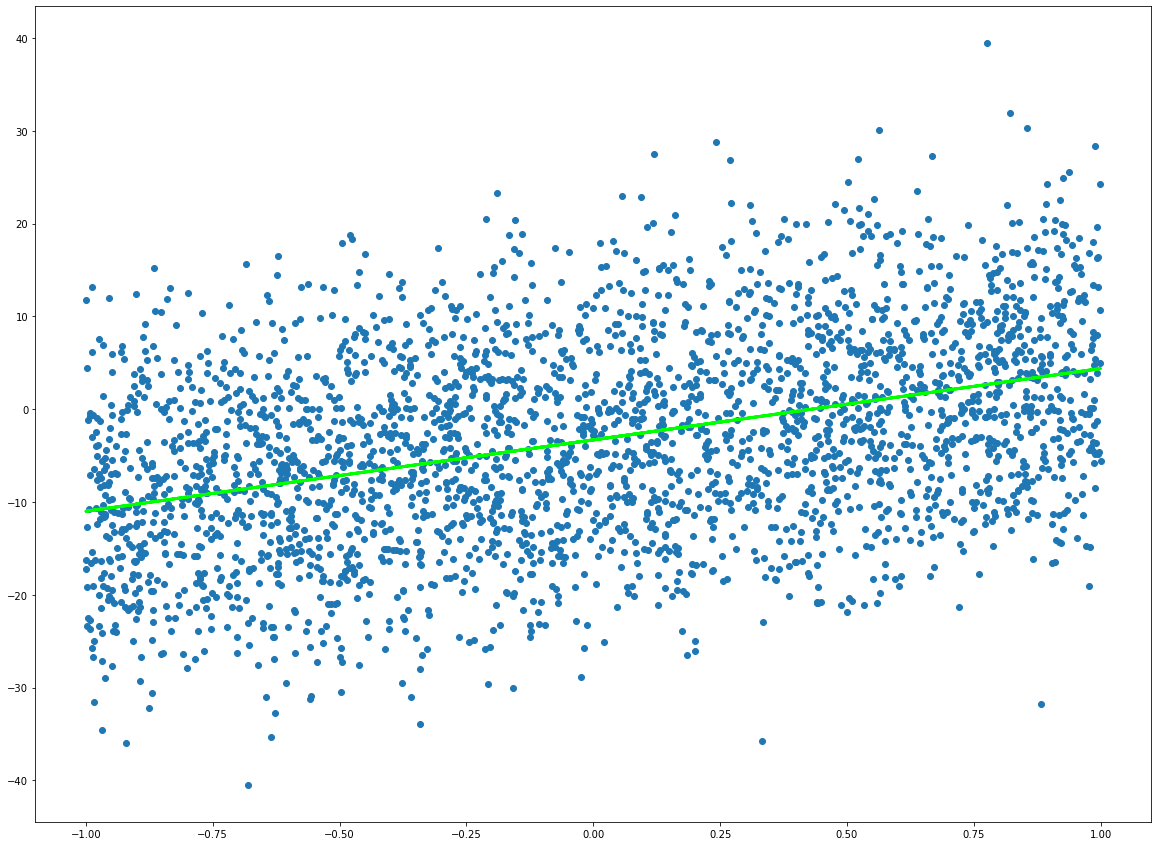

In [27]:
y_pred=reg2.predict(X_test)
plt.scatter(X_test[:,1],y_test[:,])
plt.plot(X_test[:,1],y_pred, color='lime', linewidth=3)
plt.show()

In [28]:
#comparison of obtained coefficients via gradient descent and via sklearn
print('результат SGD', w)
print('результат sklearn', reg2.coef_)

результат SGD [[-2.93129955]
 [ 7.53625493]]
результат sklearn [-1.64334298  7.69046574]
